In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import networkx as nx
import scipy
import re

from glob import glob
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nxviz
from nxviz.plots_cust import CircosPlot, MatrixPlot, ArcPlot, BasePlot

sleepstate_labels = ['NREM', 'REM']
r_order = ["Orbitofrontal", "Dorsofrontal", "Central", ' Cingular', 'Insula', 'Superotemporal', 'Laterotemporal',
           'Basotemporal', 'Mesiotemporal', 'Sylvian', 'Parietal', 'Occipital']

data_con_file = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\data_con.csv'
if os.path.exists(data_con_file):
    data_con = pd.read_csv(data_con_file)
ss = 0
df_2 = data_con[data_con.SleepState == sleepstate_labels[ss]]
chan_ID = np.unique(np.concatenate([df_2.Stim, df_2.Chan])).astype('int')

In [2]:
G = nx.empty_graph(len(chan_ID))
for i in range(len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.nodes[i]["subj"] = df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0]
        G.nodes[i]["region"] = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
    else:
        G.nodes[i]["subj"] = df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0]
        G.nodes[i]["region"] = df_2.loc[df_2.Chan == chan_ID[i], 'ChanR'].values[0]

## edges
df_2_edges = df_2[df_2.prob_wake > 1]
for i in range(len(df_2_edges)):
    c = 'b'
    if df_2_edges.prob_wake.values[i].astype('int') == 3:
        c = 'r'
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0],
               weight=df_2_edges.prob_wake.values[i].astype('int'), color=c)

### Plots

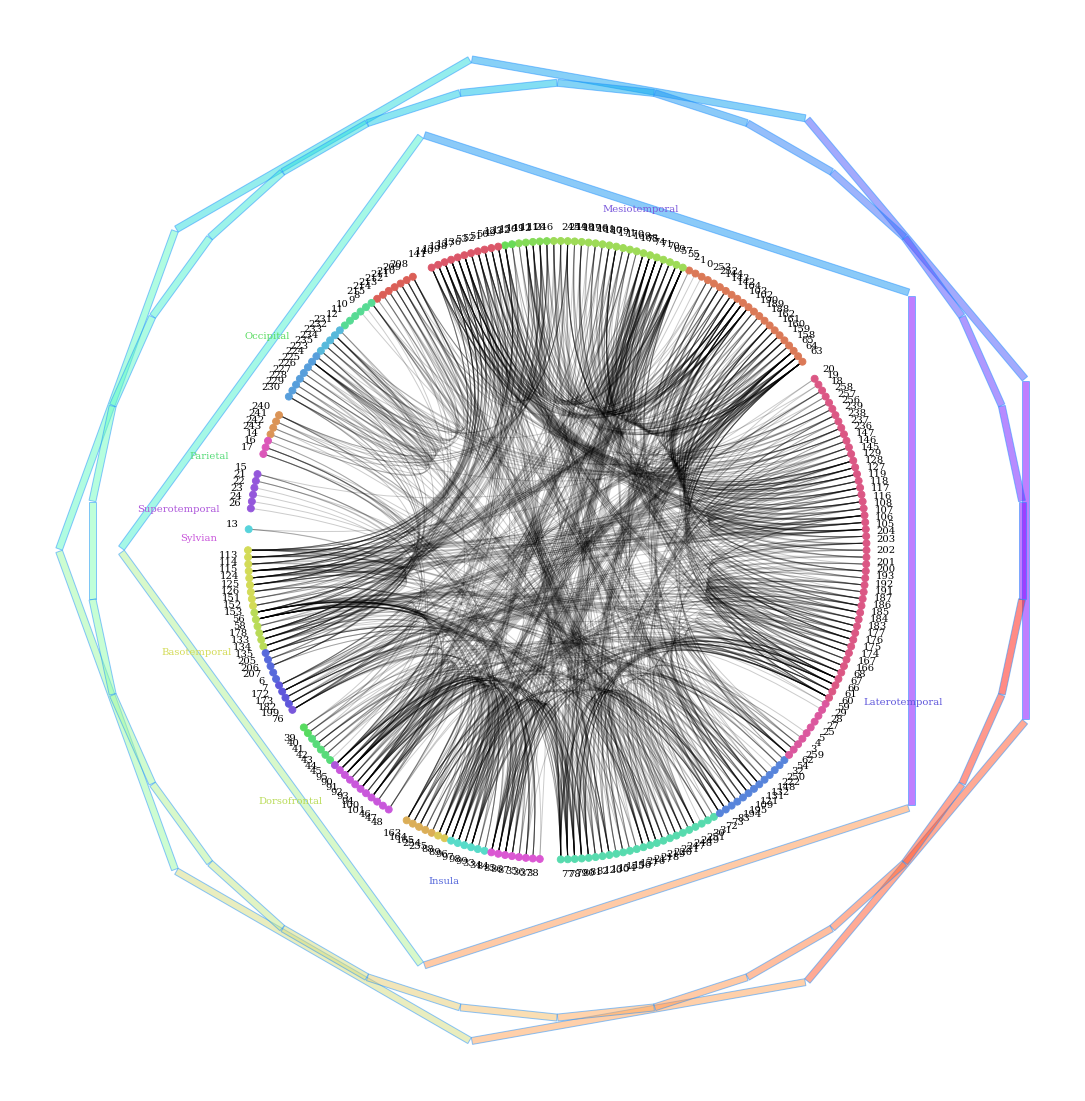

In [3]:

c = CircosPlot(
    G,
    node_grouping="region",
    node_subgrouping=["area", "subj"],
    node_color="area",
    node_order="area",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=6,
    figsize=(20, 20)
)
c.draw()
plt.show()